- 계절차분먼저 > 일반차분

In [ ]:
## TimeSeries Analysis

## 목차============================================================
# 패키지 설치 및 로드
# EDA
# 시계열분해 및 회귀분석을 이용한 예측
# 지수평활을 이용한 예측
# ARIMA를 이용한 예측
# 모형 평가 및 진단
##=================================================================

## Install/Load packages

In [52]:
# 1. install/load packages

# install.packages('forecast')
# install.packages('tseries')
# install.packages('ggplot2')
# install.packages('reshape')
# install.packages('zoo')
# install.packages('fUnitRoots')

library(forecast)
library(tseries)
library(ggplot2)
library(reshape)
library(zoo)
library(fUnitRoots)

In [3]:
#============================================================
# Data Load
# - 1949년 ~ 1960년 까지의 월별 비행기 탑승 고객 수
#============================================================ 

origin <- AirPassengers
origin

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [5]:
class(origin)

[1] "ts"

In [8]:
# ts함수
# ts(data, start, end, frequency)
# data: 시계열 데이터로 변환 시키고자 하는 벡터
# start: 자료의 시작 시점 지정
# end: 자료의 끝점 지점
# freq: 단위시간 당 관측 수

In [7]:
# stl : 시계열 분해 함수
ex1 <- rnorm(144) 
class(ex1)

[1] "numeric"

## EDA

In [9]:
ex1 <- ts(ex1, start=c(2023,1), frequency = 12)
class(ex1)

[1] "ts"

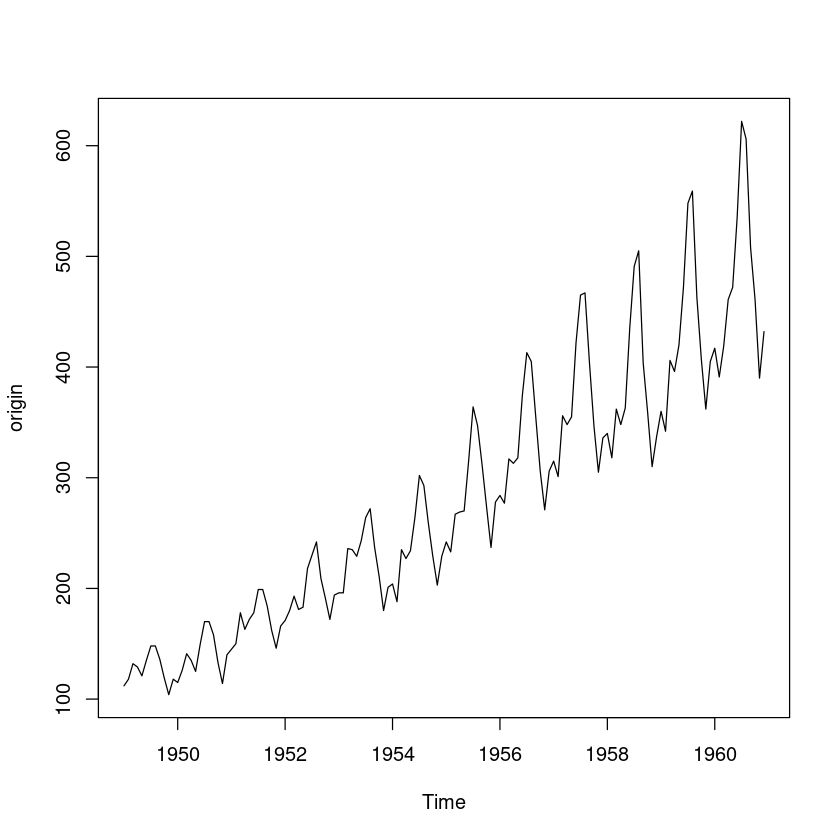

In [10]:
#============================================================
# EDA
#============================================================ 

# 시도표
plot(origin)
# 데이터에 이분산이 존재함을 확인일 수 있음
# 분산 안정화를 위한 데이터 변환 필요

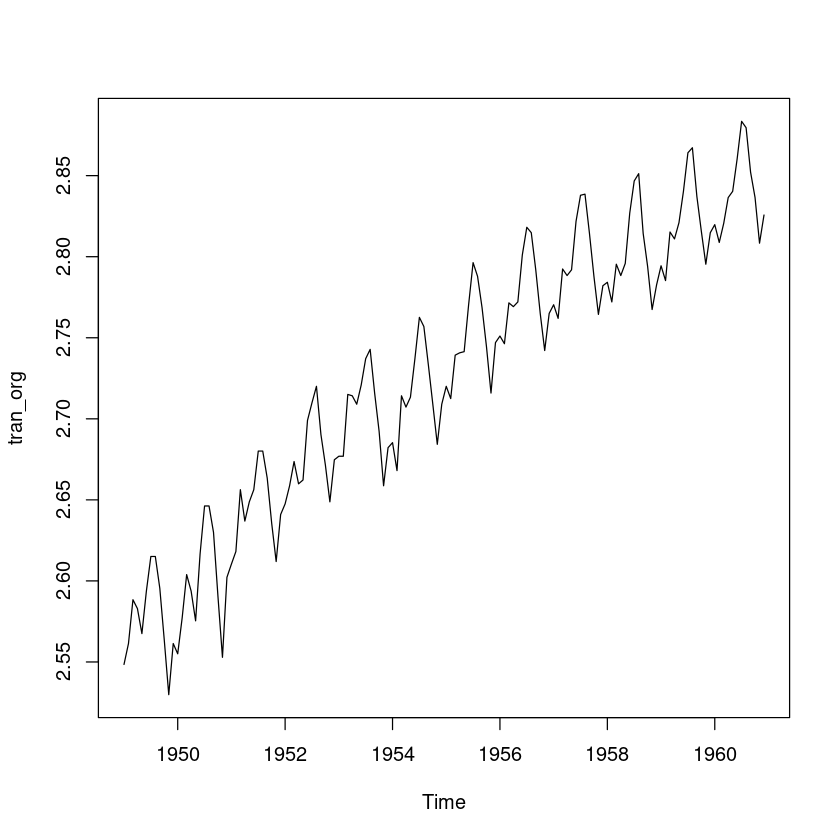

In [11]:
#분산 안정화를 위한 BoxCox 변환
lambda <- BoxCox.lambda(origin)
tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org)
# BoxCox 변환 이후 이분산의 효과가 줄어 든것을 확인

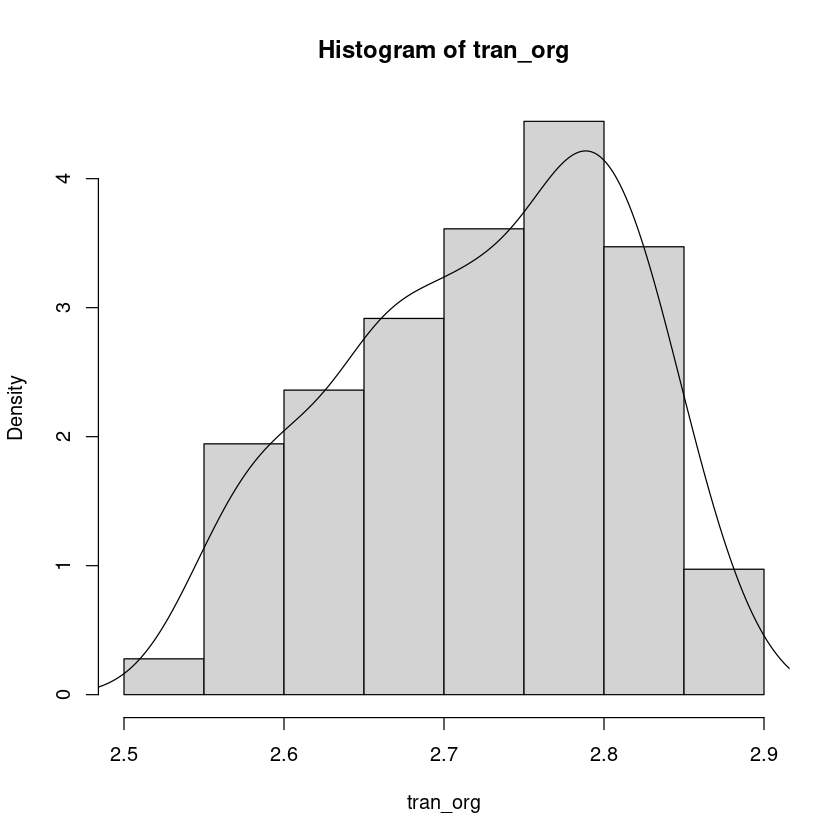

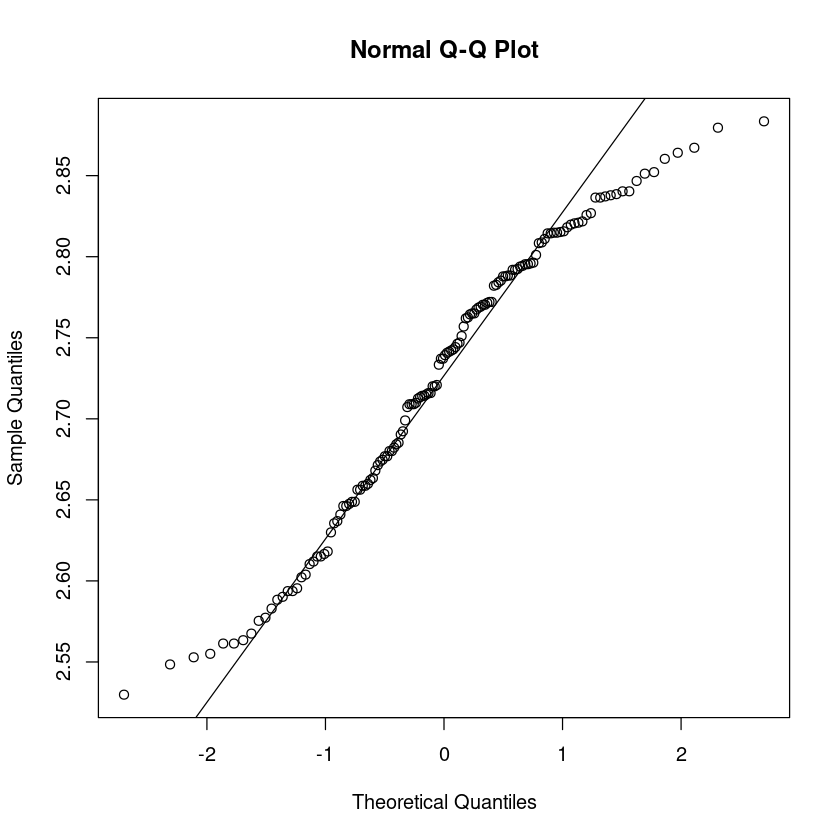

In [13]:
# 정규성 및 Corr
# Hist Plot
hist(tran_org,prob=TRUE,12)
lines(density(tran_org))
# Q-Q PLOT
qqnorm(tran_org)
qqline(tran_org)

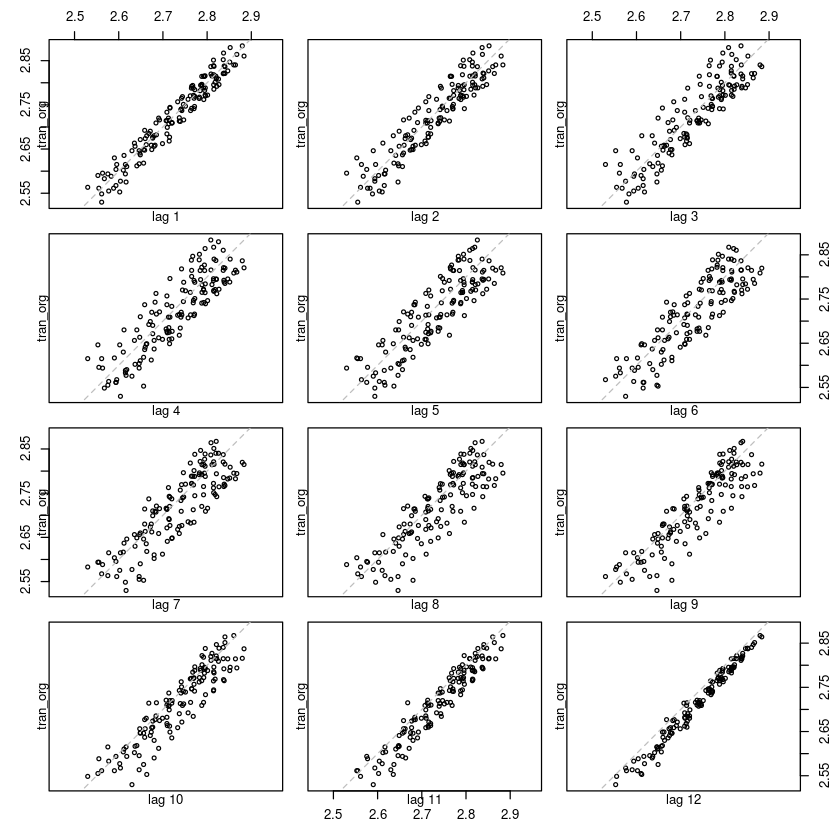

In [15]:
# 상관관계 확인
lag.plot(tran_org,12,do.lines=FALSE)
#전반적으로 데이터는 정규분포라고 하기는 어려움.
#시차가 1,12일때 상관관계가 높음

# 시계열 분해 및 회귀분석 이용 예측

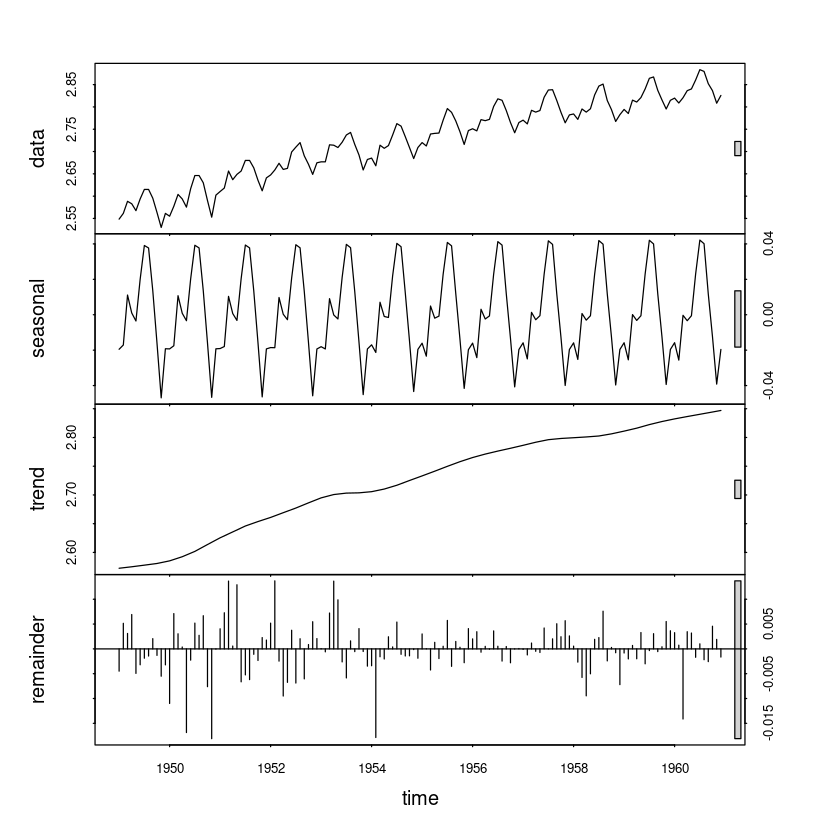

In [16]:
#============================================================
# 시계열 분해 및 회귀분석 이용 예측
#============================================================ 

#분해법 : 가법모형 
stl_tran_org <- stl(tran_org, s.window = 12)

plot(stl_tran_org)
# 1차 Trend와 Seasonality 존재
# 잔차는 White Noise로 판단

In [17]:
# 회귀모형 
# 계절형 Dummy 변수 생성
M <- factor(cycle(tran_org))
M

[1] 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1 
 [26] 2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2 
 [51] 3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3 
 [76] 4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4 
[101] 5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5 
[126] 6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12

In [19]:
stl_tran_org_df <- as.data.frame(stl_tran_org$time.series)
head(stl_tran_org_df)

,seasonal,trend,remainder
,<dbl>,<dbl>,<dbl>
1,-0.0195009846,2.572470,-0.004485195
2,-0.0170966571,2.573324,0.005147320
3,0.0111248690,2.574178,0.003105273
4,0.0009896123,2.575032,0.006915958
5,-0.0035318860,2.575972,-0.004933871
6,0.0200103731,2.576911,-0.003201882


In [20]:
# 회귀 모형 생성
# 모형식 : tran_org=trend∗β1+M1∗d1+...+M12∗d12+ϵ
# 가변수를 회귀모형에 넣을 때는 절편을 포함하는 것과 포함하지 않는 것에 대한 회귀계수 의미가 달라짐을 유의
model_stl <- lm(formula = tran_org~0+ stl_tran_org_df$trend+M, na.action = NULL)
summary(model_stl)


Call:
lm(formula = tran_org ~ 0 + stl_tran_org_df$trend + M, na.action = NULL)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0208982 -0.0030056  0.0003675  0.0032375  0.0186285 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
stl_tran_org_df$trend  1.003132   0.006557 152.982  < 2e-16 ***
M1                    -0.025890   0.017899  -1.446  0.15043    
M2                    -0.029141   0.017911  -1.627  0.10614    
M3                    -0.002850   0.017923  -0.159  0.87389    
M4                    -0.009503   0.017936  -0.530  0.59713    
M5                    -0.010617   0.017948  -0.592  0.55519    
M6                     0.012901   0.017961   0.718  0.47386    
M7                     0.032071   0.017974   1.784  0.07669 .  
M8                     0.030402   0.017986   1.690  0.09335 .  
M9                     0.004045   0.017998   0.225  0.82255    
M10                   -0.023032   0.018011  -1.279  0.20322    
M11          

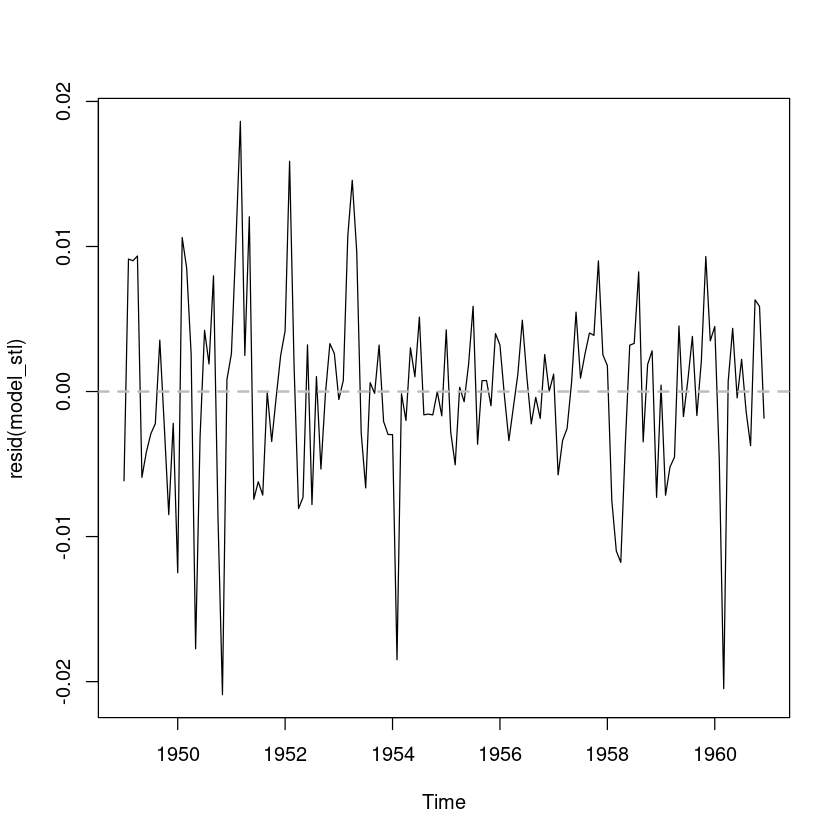

In [53]:
# 잔차 검정
# time Plot
plot(resid(model_stl))
abline(h=0, col='grey', lty=2, lwd=2)

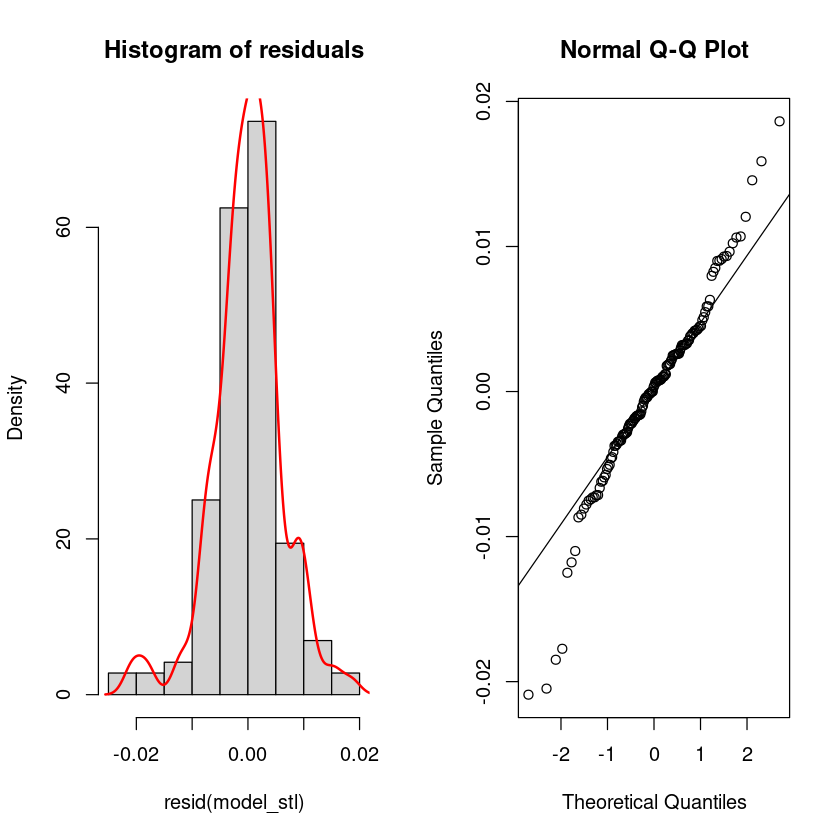

In [54]:
par(mfrow=c(1,2))
# Hist Plot
hist(resid(model_stl),prob=TRUE,12, main = "Histogram of residuals")
lines(density(resid(model_stl)), col='red', lwd=2)
# Q-Q PLOT
qqnorm(resid(model_stl))
qqline(resid(model_stl))
par(mfrow=c(1,1))
# Q-Q Plot과 Histogram을 확인하면 양쪽 끝이 두텁

In [55]:
# 잔차들간의 상관관계가 존재하는가에 대한 가설 검정 : DW test
library(lmtest)
dwtest(model_stl) #가설검정 결과 잔차들간의 1차 상관관계가 존재 : White noise 라고 할 수 없음.


	Durbin-Watson test

data:  model_stl
DW = 1.4677, p-value = 0.001001
alternative hypothesis: true autocorrelation is greater than 0


[1] 81.14211

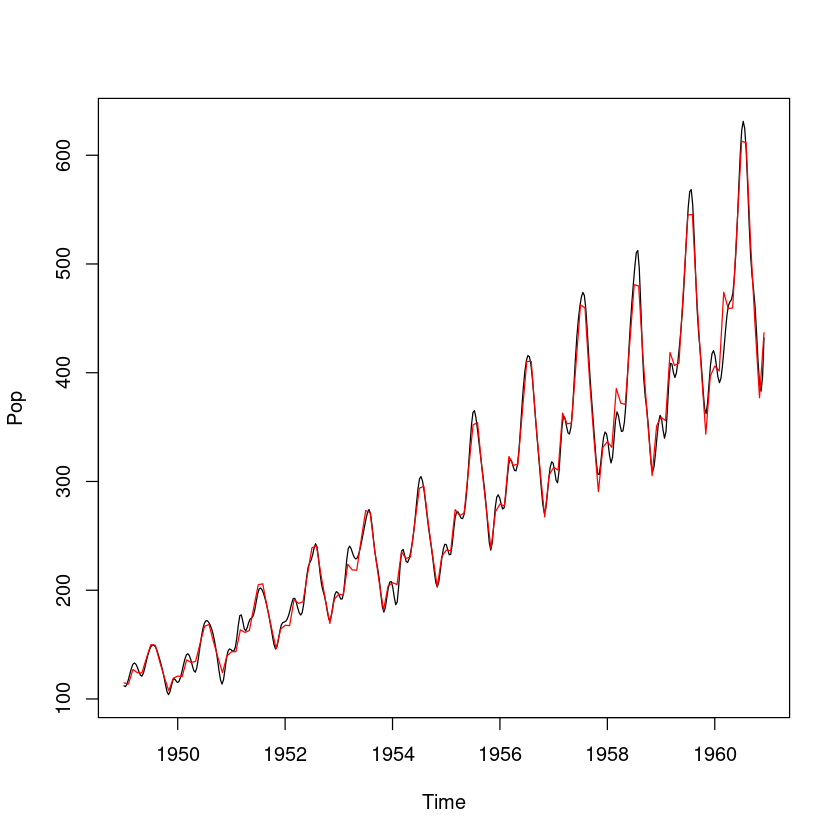

In [56]:
# 회귀모형 예측 결과 확인
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')

# 원 데이터 및 fitted 데이터의 비교
# BoxCox 역변환 필요 함
lines(InvBoxCox(model_stl$fitted.values, lambda = BoxCox.lambda(origin)), col='red')

mean((origin - InvBoxCox(model_stl$fitted.values, lambda = BoxCox.lambda(origin)))^2, na.rm = TRUE)  #MSE

In [57]:
# 다른방법의 회귀모형(이건 수업 시간에 안해도 될 거 같음)

t <- 1:length(origin)
model_t <- lm(formula = tran_org~ t +M, na.action = NULL)
summary(model_t) 
# model_stl 에서는 trend에 해당하는 회귀계수가 1에 가까웠는데, 
# model_t에서는 t 에 해당하는 회귀계수가 2.563 으로 trend값과 거의 유사하다. 
# 이렇게 시계열 모형을 적합할 때 회귀모형을 적합해도 되지만, 
# 이 경우 회귀모형에서의 모형 가정이 깨지게 되며 (오차의 독립성)
# 최소제곱합에 의해 구해진 회귀계수의 추정량이 더이상 베스트가 아니게 된다. (분산이 커질 수 있음)
# 따라서 시계열 데이터에 대해 회귀모형으로 적합하는 것은 적절하지 않음.


Call:
lm(formula = tran_org ~ t + M, na.action = NULL)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036966 -0.012087  0.002366  0.012002  0.030970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.563e+00  4.718e-03 543.342  < 2e-16 ***
t            1.992e-03  2.979e-05  66.862  < 2e-16 ***
M2          -3.329e-03  6.046e-03  -0.551 0.582797    
M3           2.288e-02  6.046e-03   3.785 0.000233 ***
M4           1.615e-02  6.046e-03   2.672 0.008510 ** 
M5           1.499e-02  6.047e-03   2.478 0.014474 *  
M6           3.845e-02  6.048e-03   6.358 3.13e-09 ***
M7           5.757e-02  6.048e-03   9.518  < 2e-16 ***
M8           5.581e-02  6.049e-03   9.226 6.29e-16 ***
M9           2.937e-02  6.050e-03   4.854 3.38e-06 ***
M10          2.206e-03  6.052e-03   0.365 0.716031    
M11         -2.687e-02  6.053e-03  -4.440 1.89e-05 ***
M12         -3.217e-03  6.055e-03  -0.531 0.596147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘

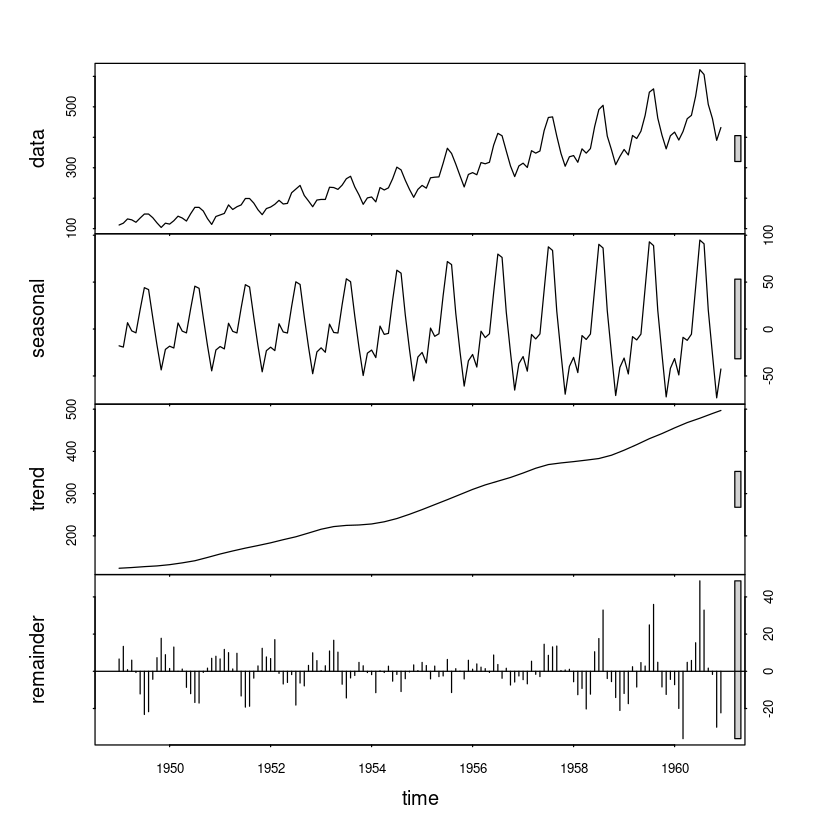

In [58]:
#============================================================
# 지수평활을 이용한 예측
#============================================================

plot(stl(origin, s.window=12))
# Trend 및 Seasonality 존재
# Holt-Winter 지수평활 모형이 적합

In [28]:
#HoltWinters 모형 생성
model_es <- HoltWinters(origin, seasonal = "multiplicative") #이분산성이 존재하기 때문에 승법모형을 적용해야 함. 
#model_es <- HoltWinters(origin, beta=F, gamma=F, seasonal = "multiplicative") #단순지수 평활 모형을 사용하고 싶다면, beta=F, gamma=F 추가.
#model_es <- HoltWinters(origin, gamma=F, seasonal = "multiplicative") #이중지수 평활 모형을 사용하고 싶다면, gamma=F 추가.

[1] 125.5362

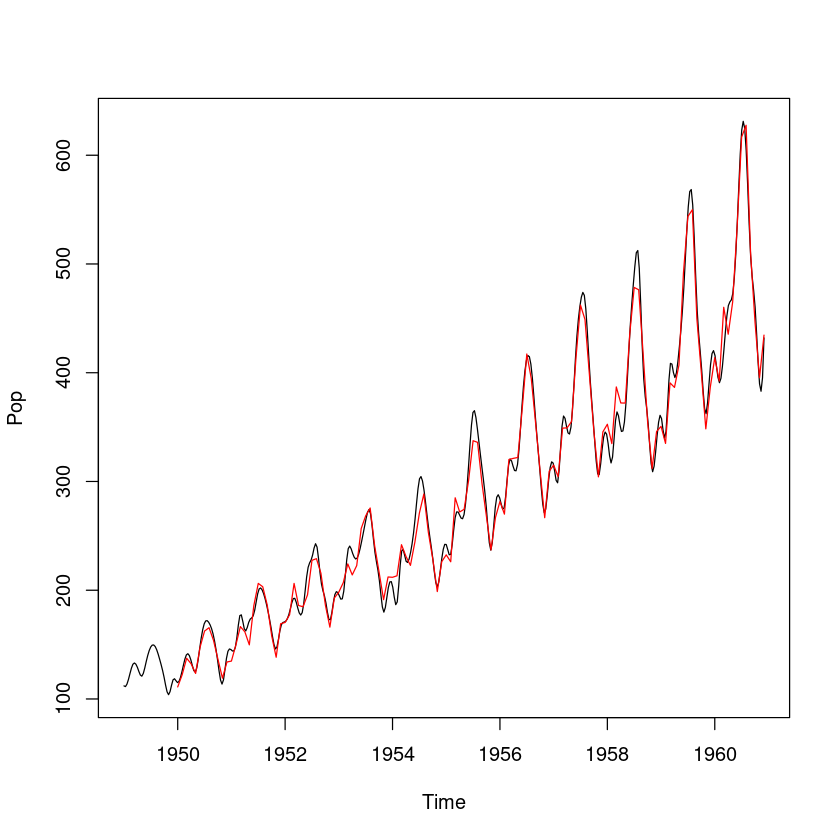

In [59]:
# 원 데이터 및 fitted 데이터의 비교
# plot
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(model_es$fitted[,1], col='red')
# mse 125.5
mean((origin-model_es$fitted[,1])^2)

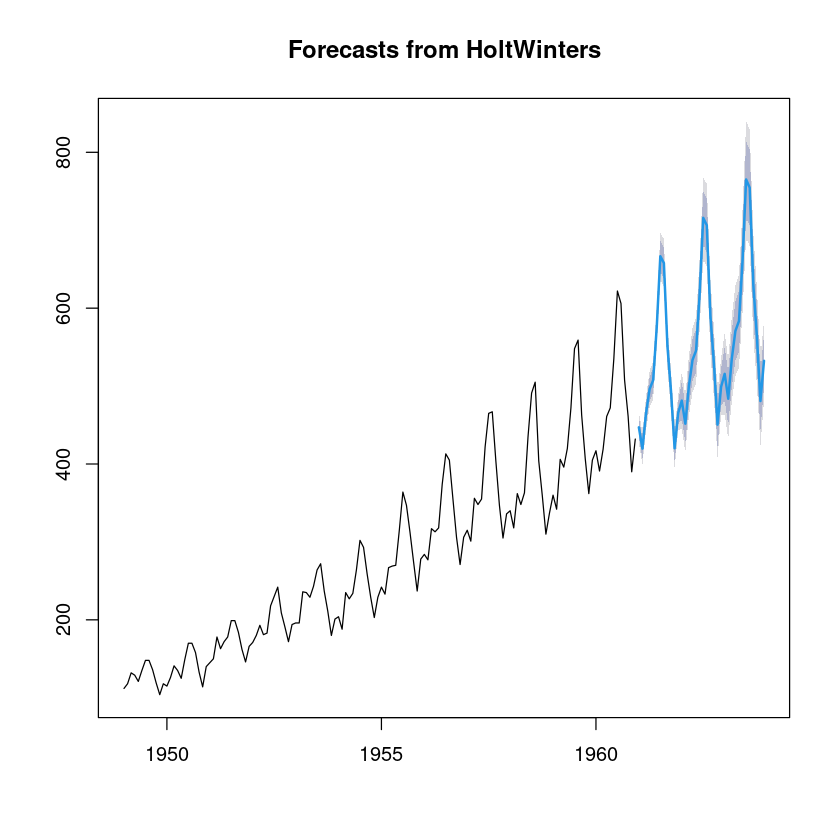

In [60]:
# 예측
plot(forecast(model_es, h=36))  #짙은 회색 : 95%신뢰구간, 옅은 회색 : 80% 신뢰구간

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,NA,120.6667,126.3333,127.3333,128.3333,134.6667,143.6667,144.0000,134.3333,119.6667,113.6667
1950,112.3333,119.6667,127.3333,134.0000,133.6667,136.3333,148.0000,163.0000,166.0000,153.6667,135.0000,129.0000
1951,133.0000,145.0000,157.6667,163.6667,171.0000,171.0000,183.0000,192.0000,194.0000,181.6667,164.0000,158.0000
1952,161.0000,172.3333,181.3333,184.6667,185.6667,194.0000,210.3333,230.0000,227.0000,214.0000,190.6667,185.6667
1953,187.3333,195.3333,209.3333,222.3333,233.3333,235.6667,245.3333,259.6667,257.6667,240.0000,209.3333,197.3333
1954,195.0000,197.6667,209.0000,216.6667,232.0000,241.6667,266.6667,286.3333,284.6667,260.3333,230.3333,220.3333
1955,224.6667,234.6667,247.3333,256.3333,268.6667,284.6667,316.3333,342.0000,341.0000,311.0000,274.3333,263.0000
1956,266.3333,279.6667,292.6667,302.3333,316.0000,335.0000,368.3333,397.3333,391.0000,355.3333,310.6667,294.3333
1957,297.3333,307.3333,324.0000,335.0000,353.0000,375.0000,414.0000,451.3333,445.3333,406.0000,352.0000,329.3333
1958,327.0000,331.3333,340.0000,342.6667,357.6667,382.0000,429.6667,477.0000,466.6667,422.6667,357.6667,335.3333


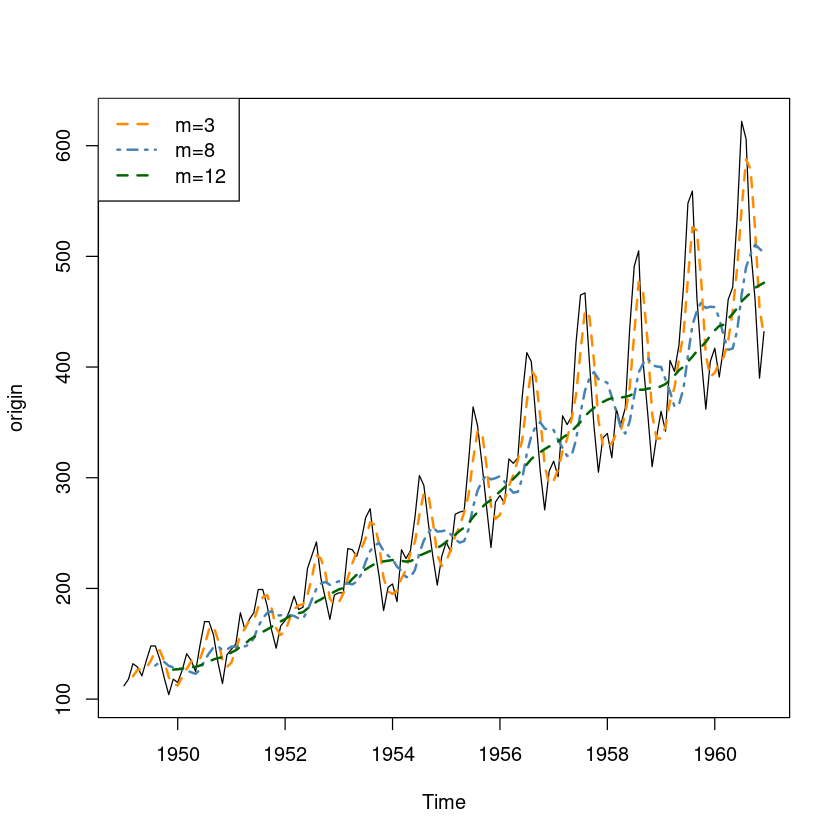

In [34]:
# 이동평균법 사용 방법
plot(origin)

library(TTR) #이동평균 SMA 함수 사용하기 위한 패키지 불러오기
originSMA3 <- SMA(origin,n=3) #window=3
originSMA3
lines(originSMA3, col='darkorange', lty=2, lwd=2)

originSMA8 <- SMA(origin,n=8) #window=8
lines(originSMA8, col='steelblue', lty=4, lwd=2)

originSMA12 <- SMA(origin,n=12) #window=12
lines(originSMA12, col='darkgreen', lty=2, lwd=2)

legend("topleft", c("m=3", "m=8", "m=12"), col=c("darkorange", "steelblue","darkgreen"), lty=c(2,4,2), lwd=2)

# ARIMA를 이용한 예측

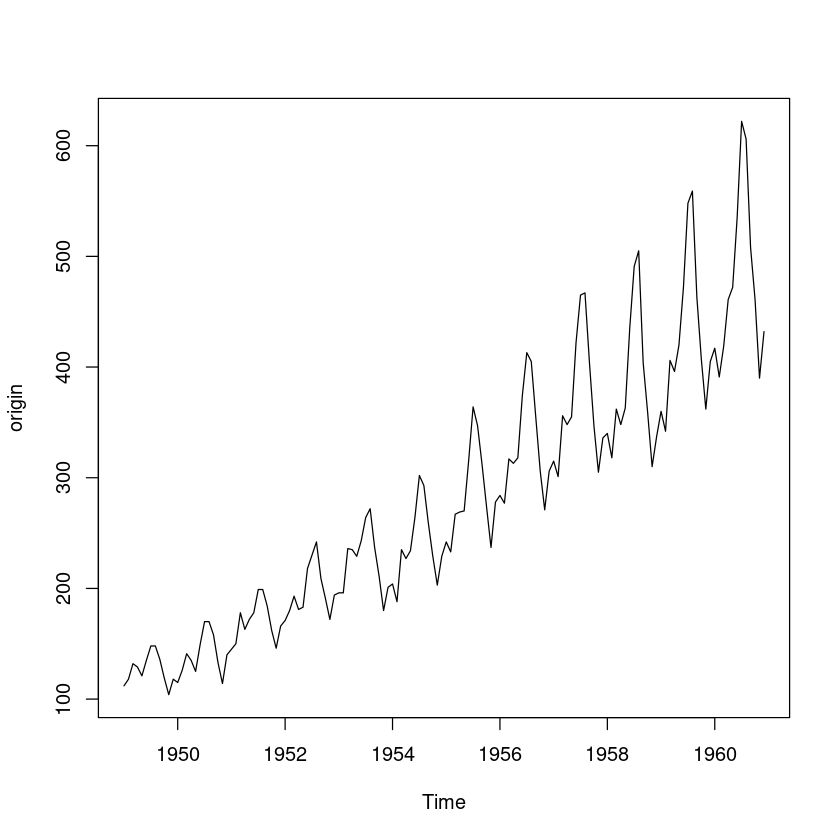

In [62]:
#============================================================
# ARIMA를 이용한 예측
#============================================================

# 데이터 탐색 및 모형식별
# 시도표
plot(origin)
# 데이터의 이분산과 1차 추세, 계정성분이 존재

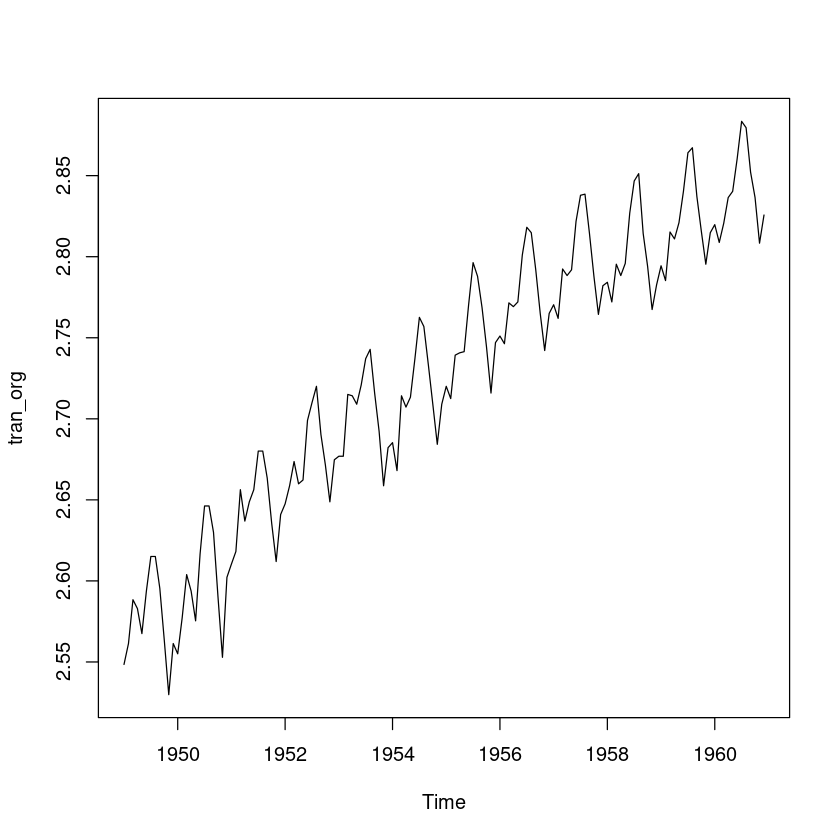

In [63]:
# 우선 분산 안정화를 위한 Box Cox 변환

# 분산 안정화
tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org)
# plot(log(tran_org))  
#일반적으로 로그변환이 더 쉽기 때문에 로그변환을 훨씬 많이 사용
#이 정도면 로그변환 해도 되지만, Boxcox 변환이 아무래도 더 정확하니 Boxcox 사용

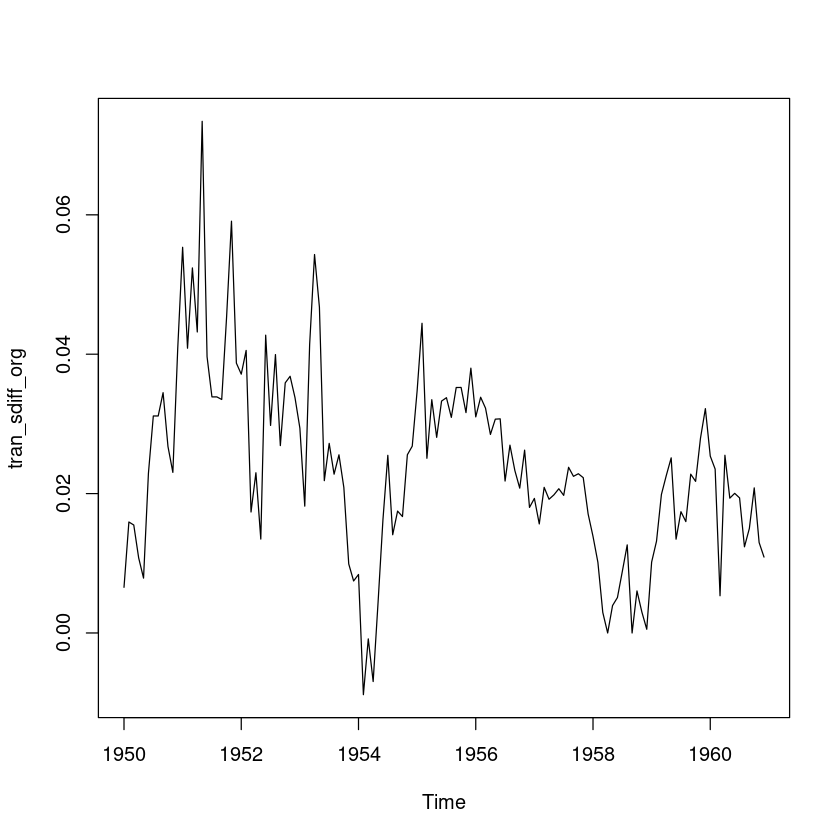

In [66]:
#계절성분이 있으므로 계절차분
tran_sdiff_org <- diff(tran_org, lag=12)
plot(tran_sdiff_org)

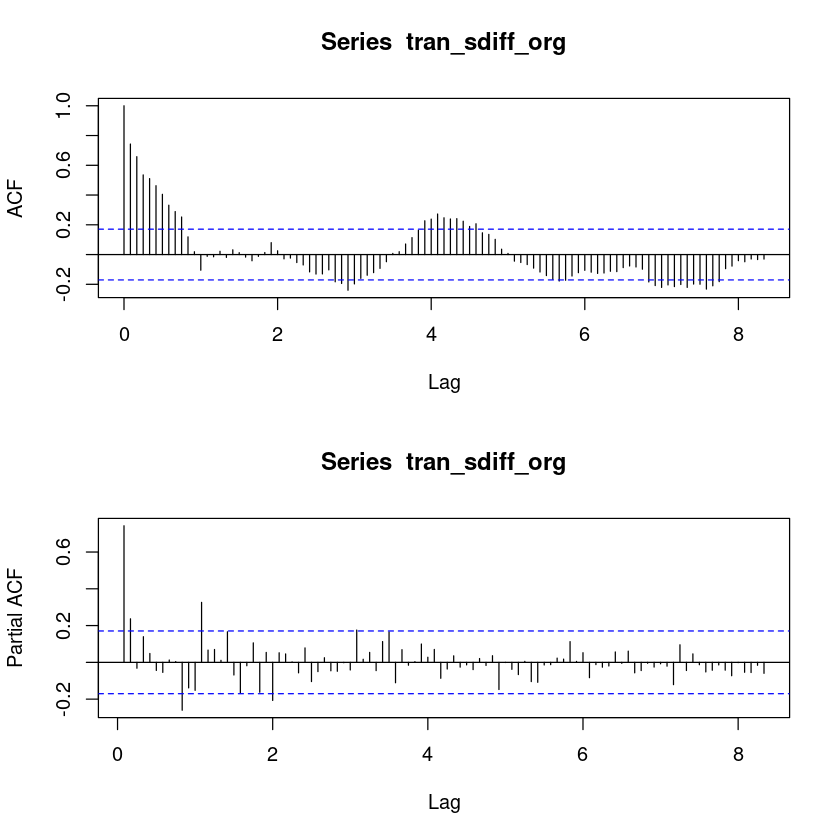

In [71]:
# ACF, PACF를 통한 탐색
layout(1:2)
acf(tran_sdiff_org, lag.max = 100) #ACF 값이 아주 천천히 감소하고 있으므로 차분이 필요함
pacf(tran_sdiff_org, lag.max= 100)

In [70]:
# 차분이 필요한지 검정 : 단위근 검정  H0 : 단위근이 있다.(즉 차분이 필요하다) 
library(fUnitRoots)  # library for function adfTest
adfTest(tran_sdiff_org, lags = 1, type = "c")  
#유의수준 5%에서는 기각할 수 있지만, 유의수준 1%에서는 기각할 수 없음. 
#ACF 값이 아주 천천히 감소하고 있기 때문에 차분을 하는 것이 좋다고 판단 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -3.0987
  P VALUE:
    0.0309 

Description:
 Thu Jun 15 23:56:28 2023 by user: 

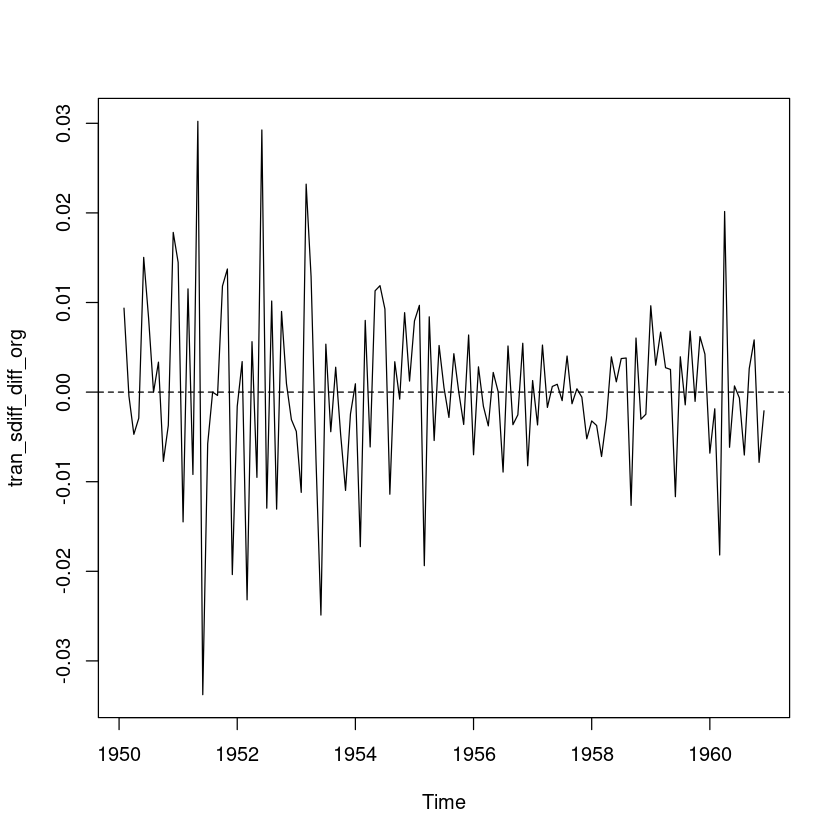

In [72]:
# 차분 실행 
tran_sdiff_diff_org <- diff(tran_sdiff_org, lag=1)
par(mfrow=c(1,1))
plot(tran_sdiff_diff_org)
abline(h=0, lty=2)

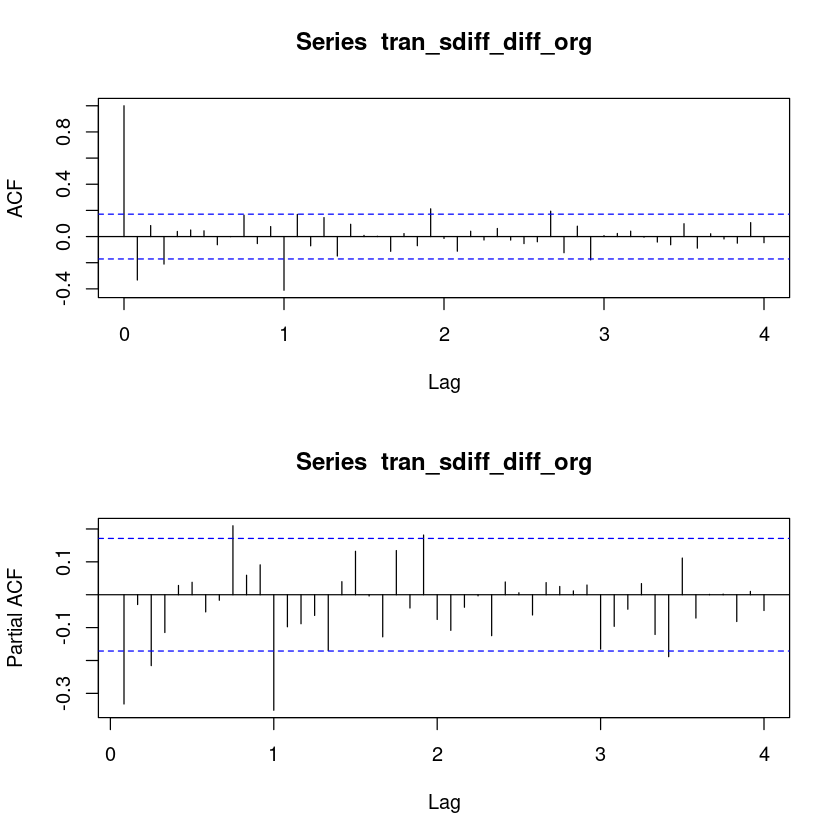

In [74]:
tran_sdiff_diff_org <- diff(diff(tran_org), lag=12)
# tran_sdiff_diff_org 
layout(1:2)
acf(tran_sdiff_diff_org, lag.max = 48)
# acf는 lag=1,3,12에서 0이 아닌값 가짐  비계절 시차 4부터 절단 -> MA(3), 계절 -> 시차 2부터 절단 SMA(1)
pacf(tran_sdiff_diff_org, lag.max = 48)
# 시차 1와 9에서 0보다 큰 값을 가짐 -> AR(3), 계절 : 시차2부터 절단 ->  SAR(1) 
# 정확한 모형을 찾기 위해
# auto.arima를 통해 aic가 최소가 되는 order 값 구함
# 이론적으로는 ACF/PACF 그림을 보고 차수를 결정할 수 있다고는 하지만
# 실제 데이터 분석에서는 그림을 보고 결정하는 것은 어렵다.
# 참고 정도로 사용할 수 있음

In [75]:
auto.arima(tran_sdiff_diff_org, max.p = 3, max.q=3, max.Q=1, trace = T)  #trace = T 옵션을 사용하면 모형 선택 과정 확인 가능
auto.arima(tran_org, max.p = 3, max.q=3, max.Q=1, trace = T)
# 두 개 모형의 MA, SMA 계수의 추정값이 동일
# 모형 구축


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : -888.1739
 ARIMA(0,0,0)            with non-zero mean : -843.0306
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : -883.5747
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : -895.1215
 ARIMA(0,0,0)            with zero mean     : -845.0917
 ARIMA(0,0,1)            with non-zero mean : -858.0611
 ARIMA(0,0,1)(1,0,1)[12] with non-zero mean : -893.3952
 ARIMA(0,0,1)(1,0,0)[12] with non-zero mean : -887.4301
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : -878.063
 ARIMA(1,0,1)(0,0,1)[12] with non-zero mean : -894.3536
 ARIMA(0,0,2)(0,0,1)[12] with non-zero mean : -893.8846
 ARIMA(1,0,0)(0,0,1)[12] with non-zero mean : -891.2874
 ARIMA(1,0,2)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,1)(0,0,1)[12] with zero mean     : -896.9867
 ARIMA(0,0,1)            with zero mean     : -860.1546
 ARIMA(0,0,1)(1,0,1)[12] with zero mean     : -895.2889
 ARIMA(0,0,1)(1,0,0)[12] with zero mean     : -889.5278
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : -880.067

Series: tran_sdiff_diff_org 
ARIMA(0,0,1)(0,0,1)[12] with zero mean 

Coefficients:
          ma1     sma1
      -0.4355  -0.5847
s.e.   0.0908   0.0725

sigma^2 = 5.789e-05:  log likelihood = 451.59
AIC=-897.18   AICc=-896.99   BIC=-888.55


 ARIMA(2,1,2)(1,1,1)[12]                    : -890.0671
 ARIMA(0,1,0)(0,1,0)[12]                    : -845.0917
 ARIMA(1,1,0)(1,1,0)[12]                    : -885.7089
 ARIMA(0,1,1)(0,1,1)[12]                    : -897.0051
 ARIMA(0,1,1)(0,1,0)[12]                    : -860.1577
 ARIMA(0,1,1)(1,1,1)[12]                    : -895.3093
 ARIMA(0,1,1)(1,1,0)[12]                    : -889.5481
 ARIMA(0,1,0)(0,1,1)[12]                    : -880.0835
 ARIMA(1,1,1)(0,1,1)[12]                    : -896.1181
 ARIMA(0,1,2)(0,1,1)[12]                    : -895.713
 ARIMA(1,1,0)(0,1,1)[12]                    : -893.2917
 ARIMA(1,1,2)(0,1,1)[12]                    : -894.0985

 Best model: ARIMA(0,1,1)(0,1,1)[12]                    



Series: tran_org 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4355  -0.5847
s.e.   0.0908   0.0725

sigma^2 = 5.855e-05:  log likelihood = 451.6
AIC=-897.19   AICc=-897.01   BIC=-888.57

In [76]:
model_arima <- arima(tran_sdiff_diff_org, order=c(0,0,1), seasonal = list(order = c(0,0,1), period = 12))
model_arima <- arima(tran_org, order=c(0,1,1), seasonal = list(order = c(0,1,1), period = 12))

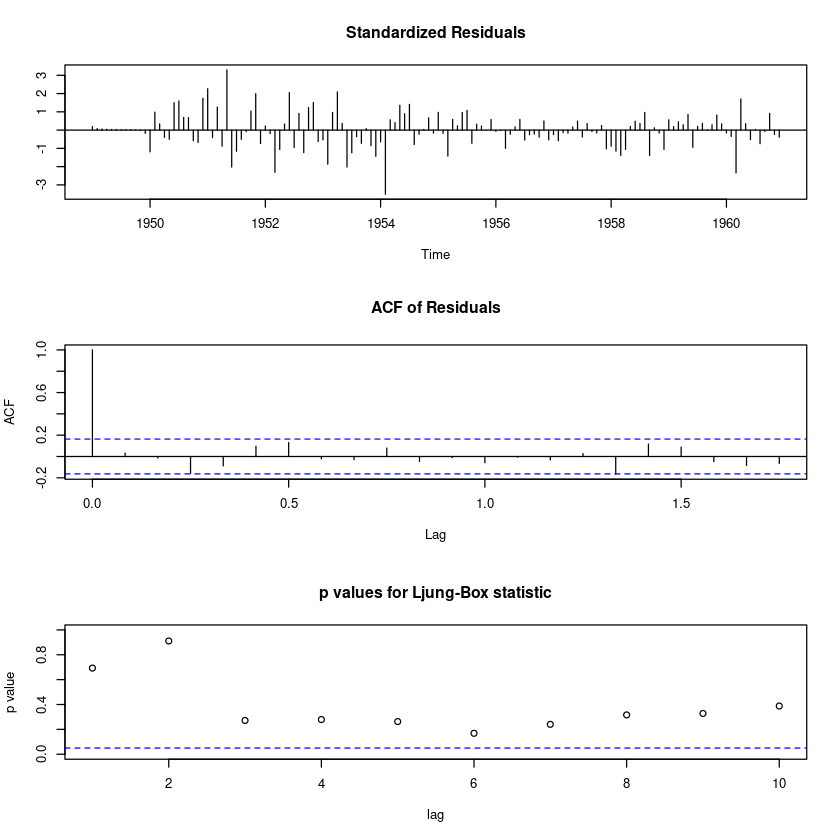

In [77]:
# 모형 검진
# 잔차 검정
tsdiag(model_arima)

In [78]:
# 독립성 검정
Box.test(model_arima$residuals, lag=1, type="Ljung-Box") #H0 : rho1 = 0
Box.test(model_arima$residuals, lag=5, type="Ljung-Box") #H0 : rho1 = ... = rho5 = 0
Box.test(model_arima$residuals, lag=10, type="Ljung-Box") #H0 : rho1 = ... = rho10 = 0

# 잔차의 독립성, 등분산성, 정규성 만족


	Box-Ljung test

data:  model_arima$residuals
X-squared = 0.15595, df = 1, p-value = 0.6929



	Box-Ljung test

data:  model_arima$residuals
X-squared = 6.472, df = 5, p-value = 0.263



	Box-Ljung test

data:  model_arima$residuals
X-squared = 10.621, df = 10, p-value = 0.3878


[1] 107.2414

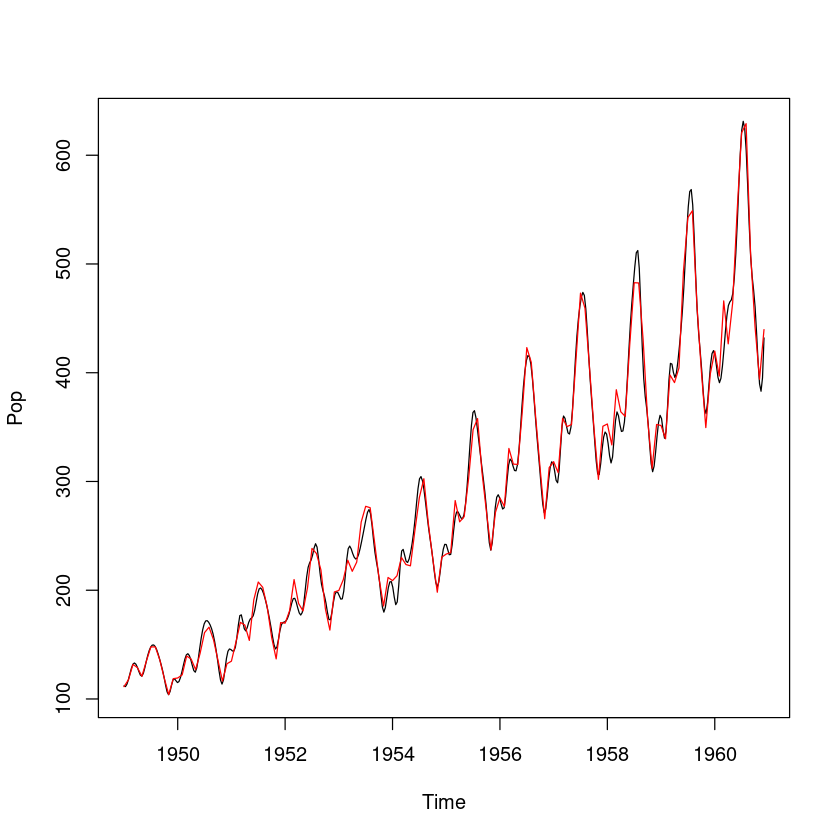

In [79]:
# 원 데이터 및 fitted 데이터의 비교
par(mfrow=c(1,1))
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(InvBoxCox(fitted(model_arima), BoxCox.lambda(origin)), col='red') #역변환 필요
mean((origin - InvBoxCox(fitted(model_arima), BoxCox.lambda(origin)))^2) #MSE

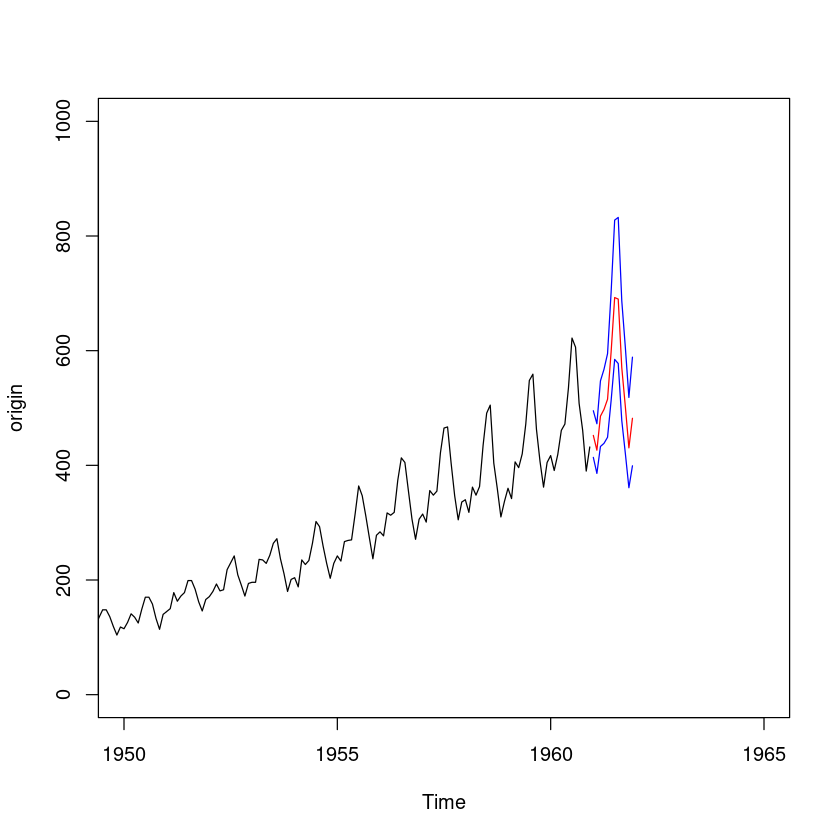

In [80]:
# 12개월 예측
arima_fit <- predict(model_arima, n.ahead=12) #BoxCox 변환 데이터 사용
lambda <- BoxCox.lambda(origin)
ts.plot(origin, xlim=c(1950,1965), ylim = c(0, 1000))
lines(InvBoxCox(arima_fit$pred, lambda),col="red")
lines(InvBoxCox(arima_fit$pred+1.96*arima_fit$se, lambda),col="blue",lty=1)
lines(InvBoxCox(arima_fit$pred-1.96*arima_fit$se, lambda),col="blue",lty=1)